In [1]:
# ! pip install matplotlib transformers datasets opencv-python h5py accelerate sckit-learn

### Importing the necessary python libraries

In [2]:
import numpy as np
import h5py
from datasets import Dataset, load_dataset
import pandas as pd
import cv2
import torch
import math
from matplotlib import pyplot as plt

import os
import shutil
import re
import glob

c:\Users\ATI-G2\Envs\trans\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sequence import ECGSequence

### defining the paths

In [8]:
hdf5_path =  r"C:\Users\ATI-G2\Documents\python\ECG\data\code-15\exams_part4.hdf5" #-- change this line
exams_csv_path = r"C:\Users\ATI-G2\Documents\python\ECG\data\code-15\exams.csv"

### Transformers and datasets using hugging faces

In [2]:
# from datasets import load_dataset
# data_root_fldr = r"C:\Users\ATI-G2\Documents\python\ECG\data\vit-data"

# data = load_dataset(data_root_fldr,split="train") 
# data



Resolving data files: 100%|██████████| 24341/24341 [00:00<00:00, 461865.65it/s]
Extracting data files: 0it [00:00, ?it/s]
Generating train split: 24341 examples [00:01, 14427.20 examples/s]                    


NonMatchingSplitsSizesError: [{'expected': SplitInfo(name='train', num_bytes=1878324, num_examples=20000, shard_lengths=None, dataset_name=None), 'recorded': SplitInfo(name='train', num_bytes=2299618, num_examples=24341, shard_lengths=None, dataset_name='vit-data')}]

### Working on extracting the labels for the generated images into a csv file

In [9]:
# pd_results.head(1)

# pd_req.info(), pd_req.describe()
# df = pd_req

# # Create a summary list of dictionaries
# summary = []

# for column in df.columns:
#     unique_counts = df[column].value_counts().to_dict()
#     summary.append({'Column': column, 'Unique_Values': unique_counts})

# # Create a summary DataFrame from the list of dictionaries
# summary_df = pd.DataFrame(summary)

# print(summary_df)


,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
exam_id,,,,,,,,,,,,,,
1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5


In [134]:
# exam_id = np.delete(np.array(f["exam_id"]),np.where(np.array(f["exam_id"])==0)).tolist()
# pd_req = pd_results.loc[exam_id,["1dAVb","RBBB","LBBB","SB","ST","AF","normal_ecg"]]
# labels_arr = pd_req.to_numpy()


Creating the folders for the classification task

In [15]:
hdf5_path =  r"C:\Users\ATI-G2\Documents\python\ECG\data\code-15\exams_part3.hdf5" #-- change this line

# with h5py.File(hdf5_path,"r") as f:

pd_results = pd.read_csv(exams_csv_path,index_col="exam_id")

file_name = re.split(r"\\", hdf5_path)[-1]

labels_list = ["1dAVb","RBBB","LBBB","SB","ST","AF","normal_ecg", "not_normal_ecg"]

pd_req = pd_results[pd_results["trace_file"]==file_name][labels_list[:-1]]
labels_arr = pd_req.to_numpy()
exam_id = pd_req.index.to_list()

dest_root_fldr = r"..\data\rough"
src_path = r"..\data\code-15\exams_part3_imgs" #--Change this line
normal_count = 0
not_normal_count = 0
disease_count = 0

shutil.rmtree(dest_root_fldr, ignore_errors = True)
os.makedirs(dest_root_fldr, exist_ok = True)

for flr in labels_list:
    os.makedirs(os.path.join(dest_root_fldr, f'{flr}'))


for i,idx in enumerate(exam_id):
    try:
        if labels_arr[i,6]==1:
            shutil.copy(os.path.join(src_path,f"{idx}.jpg"),os.path.join(dest_root_fldr, "normal_ecg"))
            normal_count += 1

        else:
            if np.count_nonzero(labels_arr[i])==0:
                shutil.copy(os.path.join(src_path,f"{idx}.jpg"), os.path.join(dest_root_fldr, "not_normal_ecg"))
                not_normal_count +=1

            else:
                clas = labels_list[np.where(labels_arr[i]==1)[0][0]]
                shutil.copy(os.path.join(src_path,f'{idx}.jpg'), os.path.join(dest_root_fldr, f"{clas}"))
                disease_count += 1

    except Exception as e:
        print(e)

print("normal count", normal_count)
print("not normal count", not_normal_count)
print("disease count", disease_count)

normal count 7670
not normal count 10133
disease count 2197


In [16]:
src = r"..\data\rough"
dest = r"..\data\vit-data\train"

for path in glob.glob(src+r"\\*\\*"):
    sub_dir = re.split(r"\\", path)[-2]
    if not "ecg" in sub_dir:
        shutil.copy(path, os.path.join(dest, sub_dir))





### Verifying the exam_id from the hdf5 and the csv file

In [152]:
# pd = pd_results[pd_results["trace_file"]=="exams_part0.hdf5"]
# exam_id_csv = pd.index.to_list()

In [149]:
# exam_id_hdf5 = np.delete(np.array(f["exam_id"]),np.where(np.array(f["exam_id"])==0)).tolist()

In [153]:
# exam_id_csv.sort()
# exam_id_hdf5.sort()

In [147]:
# exam_id_csv

In [158]:
# import csv
# with open("verify.csv", "w", newline='') as f:
#     writer = csv.writer(f)

#     for i, j in zip(exam_id_csv, exam_id_hdf5):
#         writer.writerow([i, j])

# print("written the csv file")    

written the csv file


# wfdb

In [1]:
# !pip install wfdb

import wfdb
from matplotlib import pyplot as plt
import numpy as np

record = wfdb.rdheader(r"C:\Users\ATI-G2\Documents\python\ECG\data\12-lead\WFDBRecords\01\010\JS00001")
signal_data, fields = wfdb.rdsamp(r"C:\Users\ATI-G2\Documents\python\ECG\data\12-lead\WFDBRecords\01\010\JS00002")

data = signal_data[:3000,:]
plt.figure(figsize=(10,7))
# for i, signal in enumerate(data.T):
#     plt.subplot(12,1,i+1)
#     plt.plot(np.arange(0,3000), signal)

#     # Turn off spines and axis ticks
#     plt.gca().spines['top'].set_visible(False)
#     plt.gca().spines['bottom'].set_visible(False)
#     plt.gca().spines['left'].set_visible(False)
#     plt.gca().spines['right'].set_visible(False)
#     plt.gca().tick_params(axis='both', which='both', length=0)

#     # Remove numbers along x and y-axes
#     plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
#     plt.gca().yaxis.set_major_formatter(plt.NullFormatter())

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

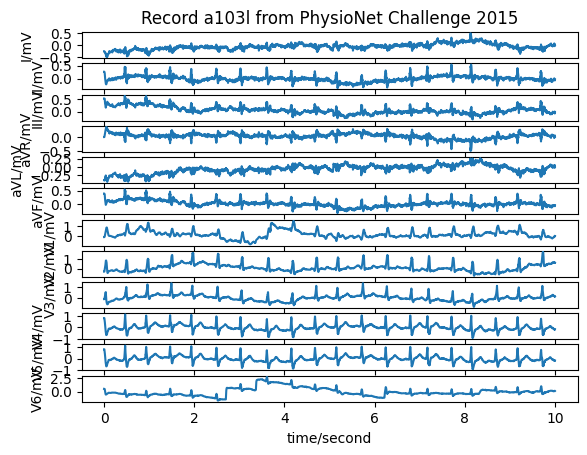

In [13]:
# wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015' ) 

# converting wfdb to hdf5

In [23]:
import h5py
import numpy as np
import glob
import wfdb
import pandas as pd
from matplotlib import pyplot as plt

In [32]:

df = pd.read_csv(r"C:\Users\ATI-G2\Documents\python\ECG\data\12-lead\12-lead_labels.csv", names=range(63))

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.zeros((63,))
tmp = 0
for i, col in enumerate(df.columns):
    x = df[col].value_counts().to_dict()
    data[i] = x[0]


df_2 = pd.read_csv(r"C:\Users\ATI-G2\Documents\python\ECG\data\12-lead\ConditionNames_SNOMED-CT.csv")
labels_id = df_2["Full Name"].values

data = 45131-data

In [44]:
labels_id.shape, data.shape

((63,), (63,))

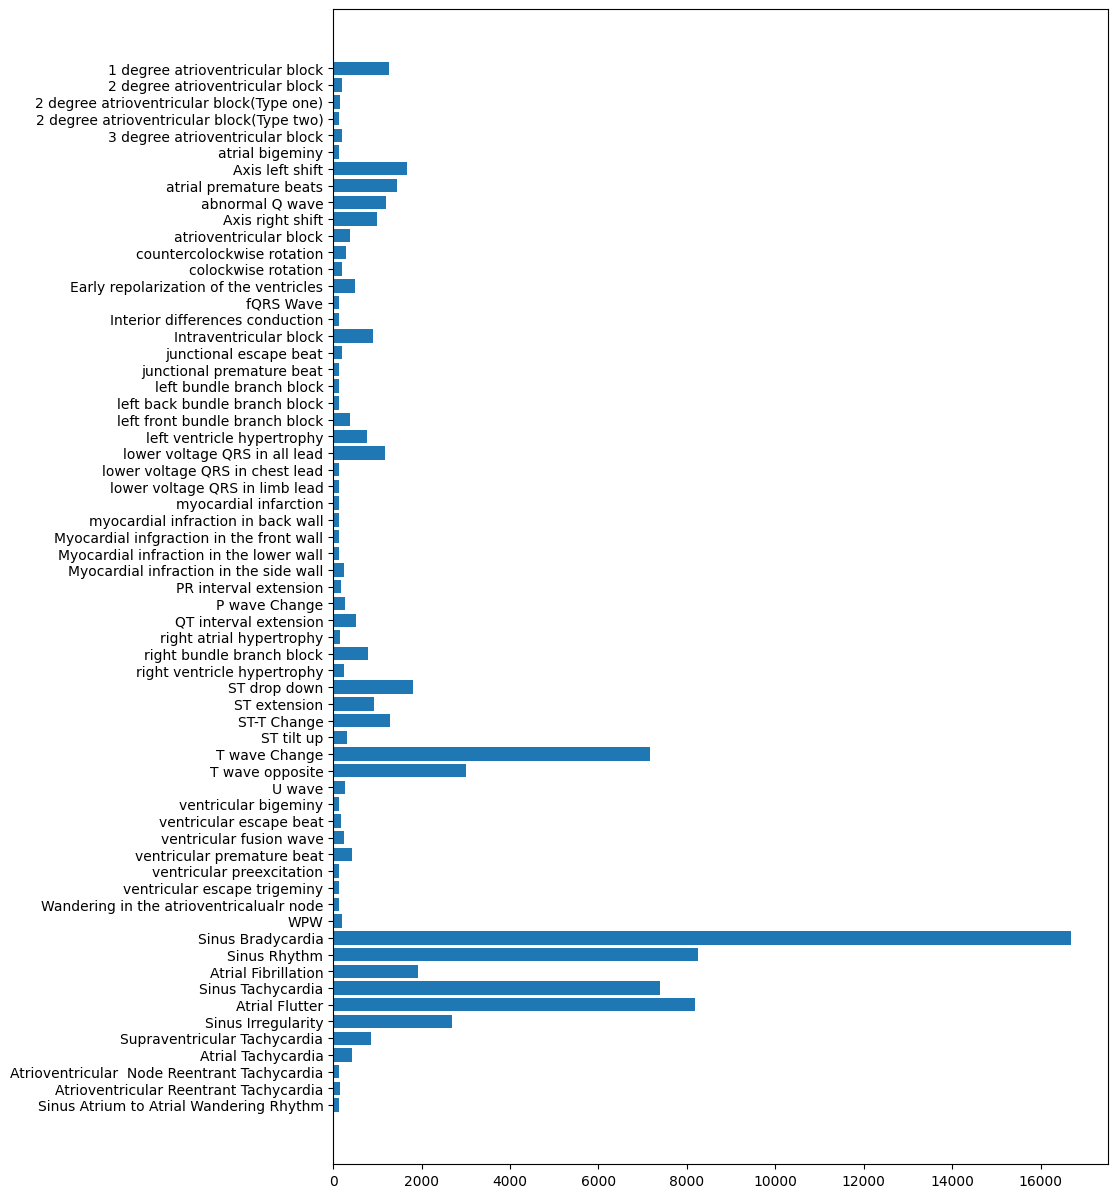

In [51]:
fig, ax = plt.subplots(figsize=(10,15))
ax.barh(labels_id, data)

ax.invert_yaxis()

# Noise removal

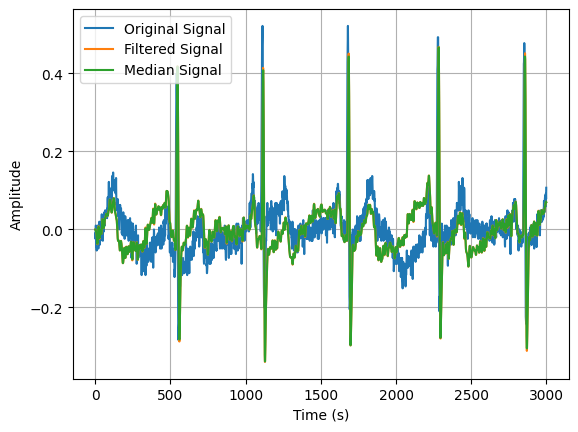

<Figure size 640x480 with 0 Axes>

In [9]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate a sample signal
sampling_rate = 500  # Sample rate in Hz
# t = np.linspace(0, 1, sampling_rate, False)  # Time array
t = np.arange(3000)
# frequencies = [50, 150]  # Frequency range in Hz
# signal_data = np.sin(2 * np.pi * frequencies[0] * t) + np.sin(2 * np.pi * frequencies[1] * t)

signal_data = data[:,0]

# Define bandpass filter specifications
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz
nyquist = 0.5 * sampling_rate
low = lowcut / nyquist
high = highcut / nyquist

# Apply bandpass filter using scipy.signal.butter
order = 4  # Filter order
b, a = signal.butter(order, [low, high], btype='band')
filtered_signal = signal.lfilter(b, a, signal_data)

# Applying the median filter
med_arr = signal.medfilt(filtered_signal)

# Plot original and filtered signals
plt.figure()
plt.plot(t, signal_data, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.plot(t, med_arr, label='Median Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()
plt.clf()

In [56]:
signal

<module 'scipy.signal' from 'c:\\Users\\ATI-G2\\Envs\\trans\\Lib\\site-packages\\scipy\\signal\\__init__.py'>